In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# Load the dataset
df = pd.read_parquet('data/daily_weather.parquet')
df_cities = pd.read_csv('data/cities.csv')
df_energy = pd.read_csv('data/energy.csv')

In [5]:
df.nunique()

station_id                 1227
city_name                  1234
date                      69648
season                        4
avg_temp_c                 1048
min_temp_c                 1029
max_temp_c                 1142
precipitation_mm           2812
snow_depth_mm               888
avg_wind_dir_deg            361
avg_wind_speed_kmh          944
peak_wind_gust_kmh          663
avg_sea_level_pres_hpa     1170
sunshine_total_min          997
dtype: int64

In [6]:
df.describe()

,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
count,27635763,2.140486e+07,2.191753e+07,2.209642e+07,2.099326e+07,3.427148e+06,3.452568e+06,5.285468e+06,1.121486e+06,4.017157e+06,1.021461e+06
mean,1982-11-29 10:03:03.195926,1.572252e+01,9.948255e+00,2.015998e+01,2.740569e+00,7.996231e+01,1.820979e+02,1.240827e+01,3.857887e+01,1.015032e+03,3.504399e+02
min,1750-02-01 00:00:00,-7.000000e+01,-9.900000e+01,-9.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.610000e+02,0.000000e+00
25%,1965-05-06 00:00:00,8.300000e+00,2.800000e+00,1.200000e+01,0.000000e+00,0.000000e+00,8.600000e+01,7.500000e+00,2.630000e+01,1.010300e+03,5.400000e+01
50%,1988-02-04 00:00:00,1.790000e+01,1.110000e+01,2.230000e+01,0.000000e+00,0.000000e+00,1.910000e+02,1.090000e+01,3.530000e+01,1.014700e+03,3.460000e+02
75%,2007-01-25 00:00:00,2.570000e+01,1.920000e+01,3.020000e+01,1.000000e+00,2.000000e+01,2.710000e+02,1.570000e+01,4.640000e+01,1.019800e+03,5.940000e+02
max,2023-09-05 00:00:00,5.040000e+01,6.420000e+01,9.700000e+01,1.000000e+03,9.710000e+03,3.600000e+02,1.763000e+02,4.392000e+02,5.852700e+03,1.302000e+03
std,NaN,1.202205e+01,1.155787e+01,1.249478e+01,9.791887e+00,3.500756e+02,1.051996e+02,7.054249e+00,2.010951e+01,8.520450e+00,2.815142e+02


In [7]:
# Display the first few rows of the dataset
df.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,41515,Asadabad,1957-07-01,Summer,27.0,21.1,35.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,41515,Asadabad,1957-07-02,Summer,22.8,18.9,32.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,41515,Asadabad,1957-07-03,Summer,24.3,16.7,35.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41515,Asadabad,1957-07-04,Summer,26.6,16.1,37.8,4.1,NaN,NaN,NaN,NaN,NaN,NaN
4,41515,Asadabad,1957-07-05,Summer,30.8,20.0,41.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN


First let's see the number of weather reports this dataset has by year

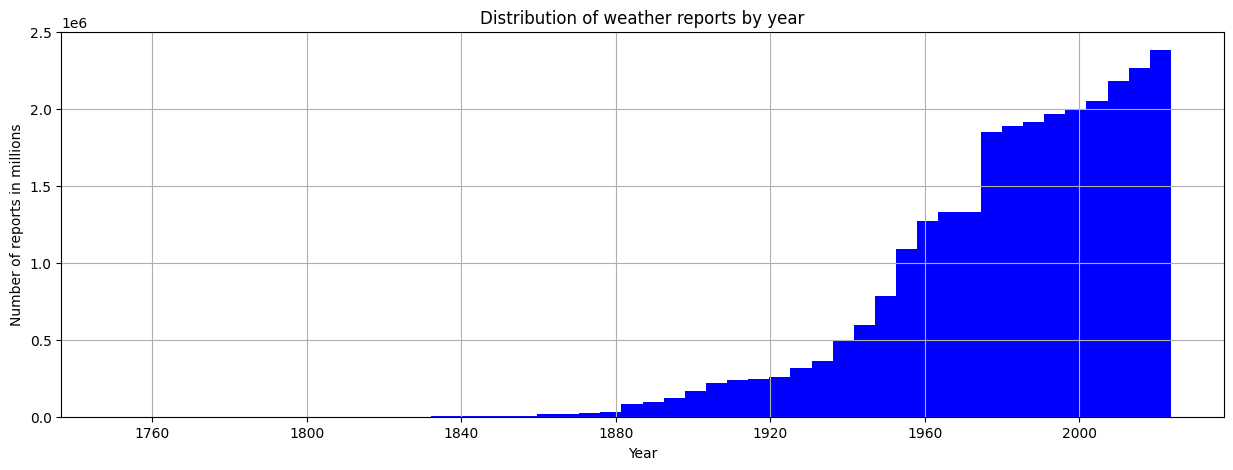

In [8]:
df['date'] = pd.to_datetime(df['date'])
ax = df['date'].hist(figsize=(15,5), bins=50, color='blue')

ax.set_title('Distribution of weather reports by year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of reports in millions')
plt.show()

We can see that this dataset contains some old data but its most significant portion is from the 50s till 2023.
So let's see from which year we should filter our dataset.
For this, we look for the number of stations by year. We know that finally we have around 1200 stations so we set 1000 stations as starting point to ensure enough geographical diversity.

/tmp/ipykernel_869359/1228799236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['date'].dt.year


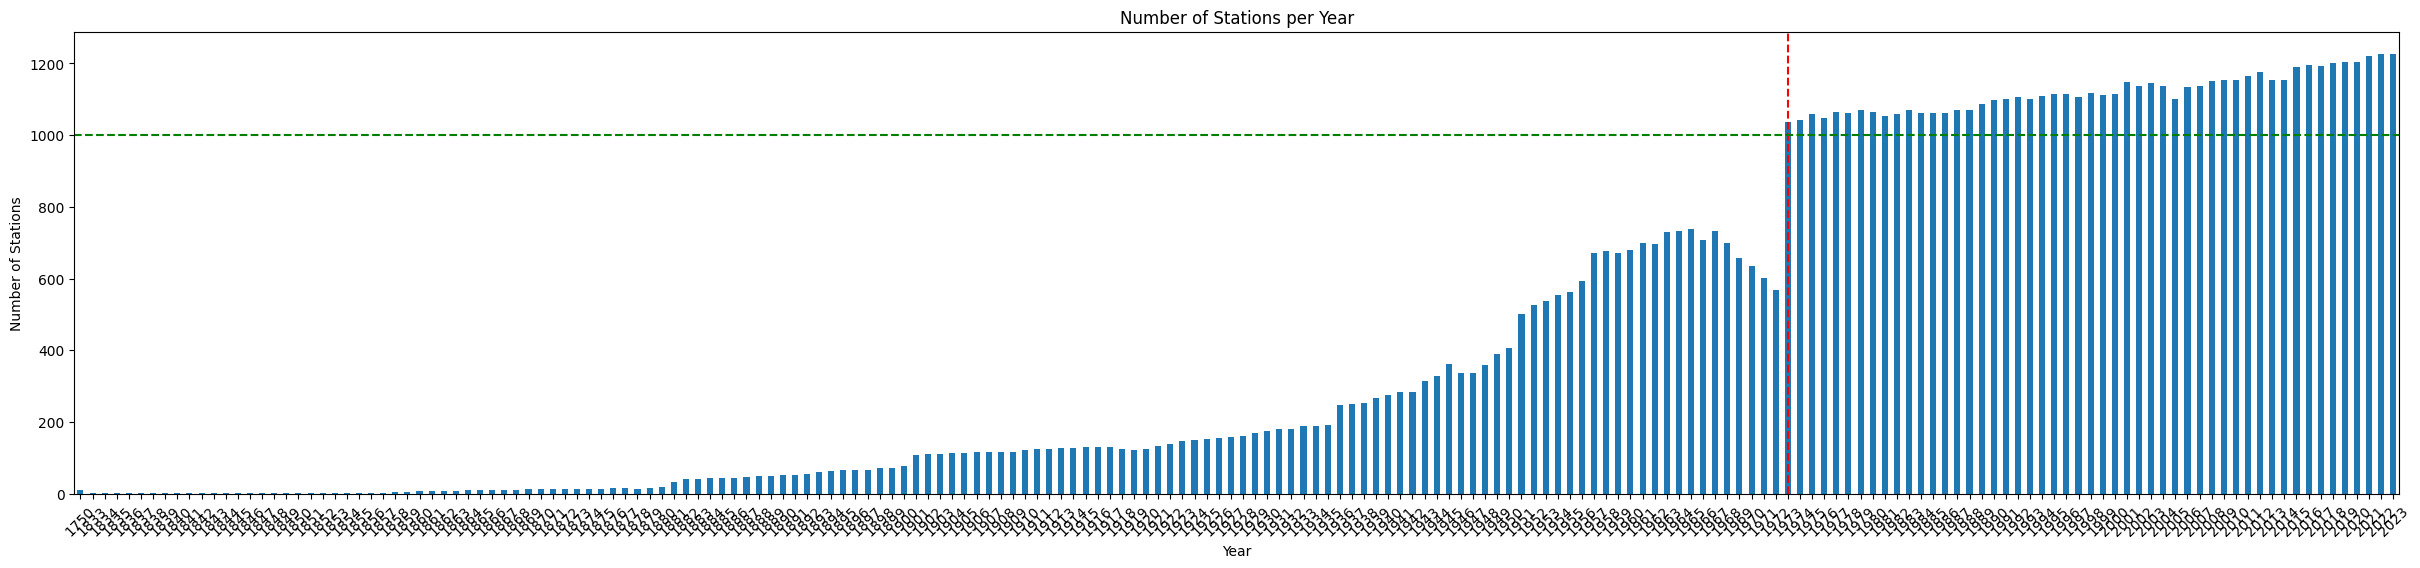

In [9]:
data = df[['station_id', 'date']]

# Extracting year from 'date' column for histogram
data['year'] = data['date'].dt.year

# Counting the number of unique stations per year
stations_per_year = data.groupby('year')['station_id'].nunique()

# Plotting
plt.figure(figsize=(30, 6))
stations_per_year.plot(kind='bar')
plt.title('Number of Stations per Year')
plt.axvline(x=np.where(stations_per_year.index == 1973)[0], color='r', linestyle='--', label='1940')
plt.axhline(y=1000, color='g', linestyle='--', label='1000 Stations')
plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.show()

Our starting point will be 1973 offering 50 years range of data.

In [10]:
df = df[df['date'].dt.year >= 1973]

In [11]:
# Check data types
print(df.dtypes)

station_id                      category
city_name                       category
date                      datetime64[us]
season                          category
avg_temp_c                       float64
min_temp_c                       float64
max_temp_c                       float64
precipitation_mm                 float64
snow_depth_mm                    float64
avg_wind_dir_deg                 float64
avg_wind_speed_kmh               float64
peak_wind_gust_kmh               float64
avg_sea_level_pres_hpa           float64
sunshine_total_min               float64
dtype: object


In [12]:
# Check for missing values
print(df.isnull().sum())

station_id                       0
city_name                    13993
date                             0
season                           0
avg_temp_c                 1175965
min_temp_c                 3521049
max_temp_c                 3128218
precipitation_mm           5469268
snow_depth_mm             16605285
avg_wind_dir_deg          15802166
avg_wind_speed_kmh        14060397
peak_wind_gust_kmh        17996255
avg_sea_level_pres_hpa    15426106
sunshine_total_min        18214637
dtype: int64


Let's ensure that all the stations report around the same number of reports

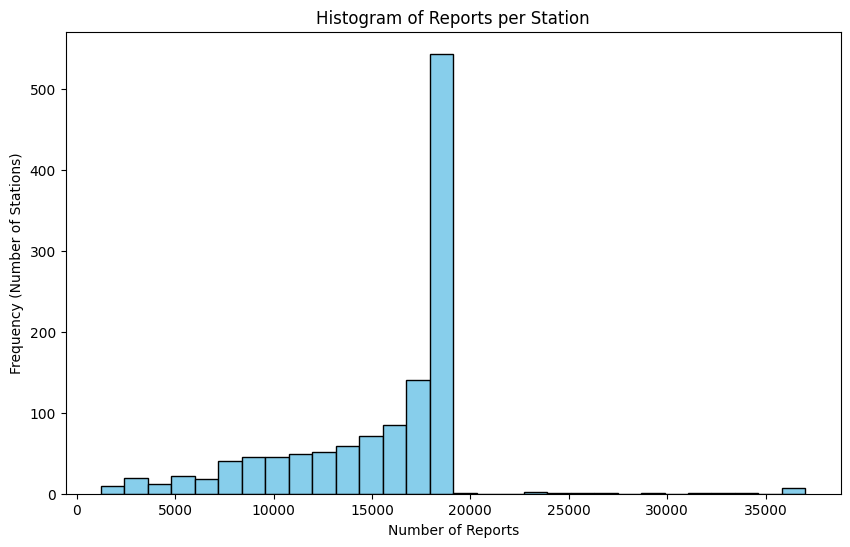

In [13]:
# Counting the number of reports per station
reports_per_station = df['station_id'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(reports_per_station, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Reports per Station')
plt.xlabel('Number of Reports')
plt.ylabel('Frequency (Number of Stations)')
plt.show()

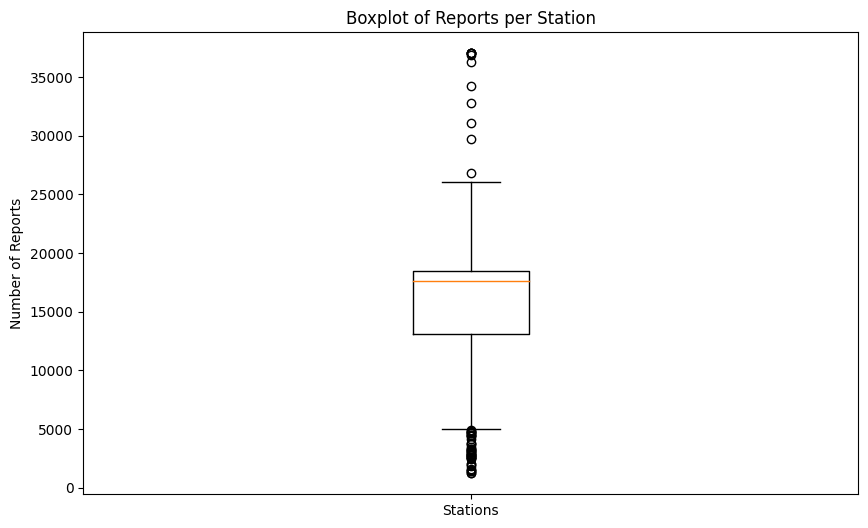

In [14]:
# Creating a boxplot for the distribution of reports per station

plt.figure(figsize=(10, 6))
plt.boxplot(reports_per_station)
plt.title('Boxplot of Reports per Station')
plt.ylabel('Number of Reports')
plt.xticks([1], ['Stations'])
plt.show()

let's see how many data is missing by year by feature in our dataset

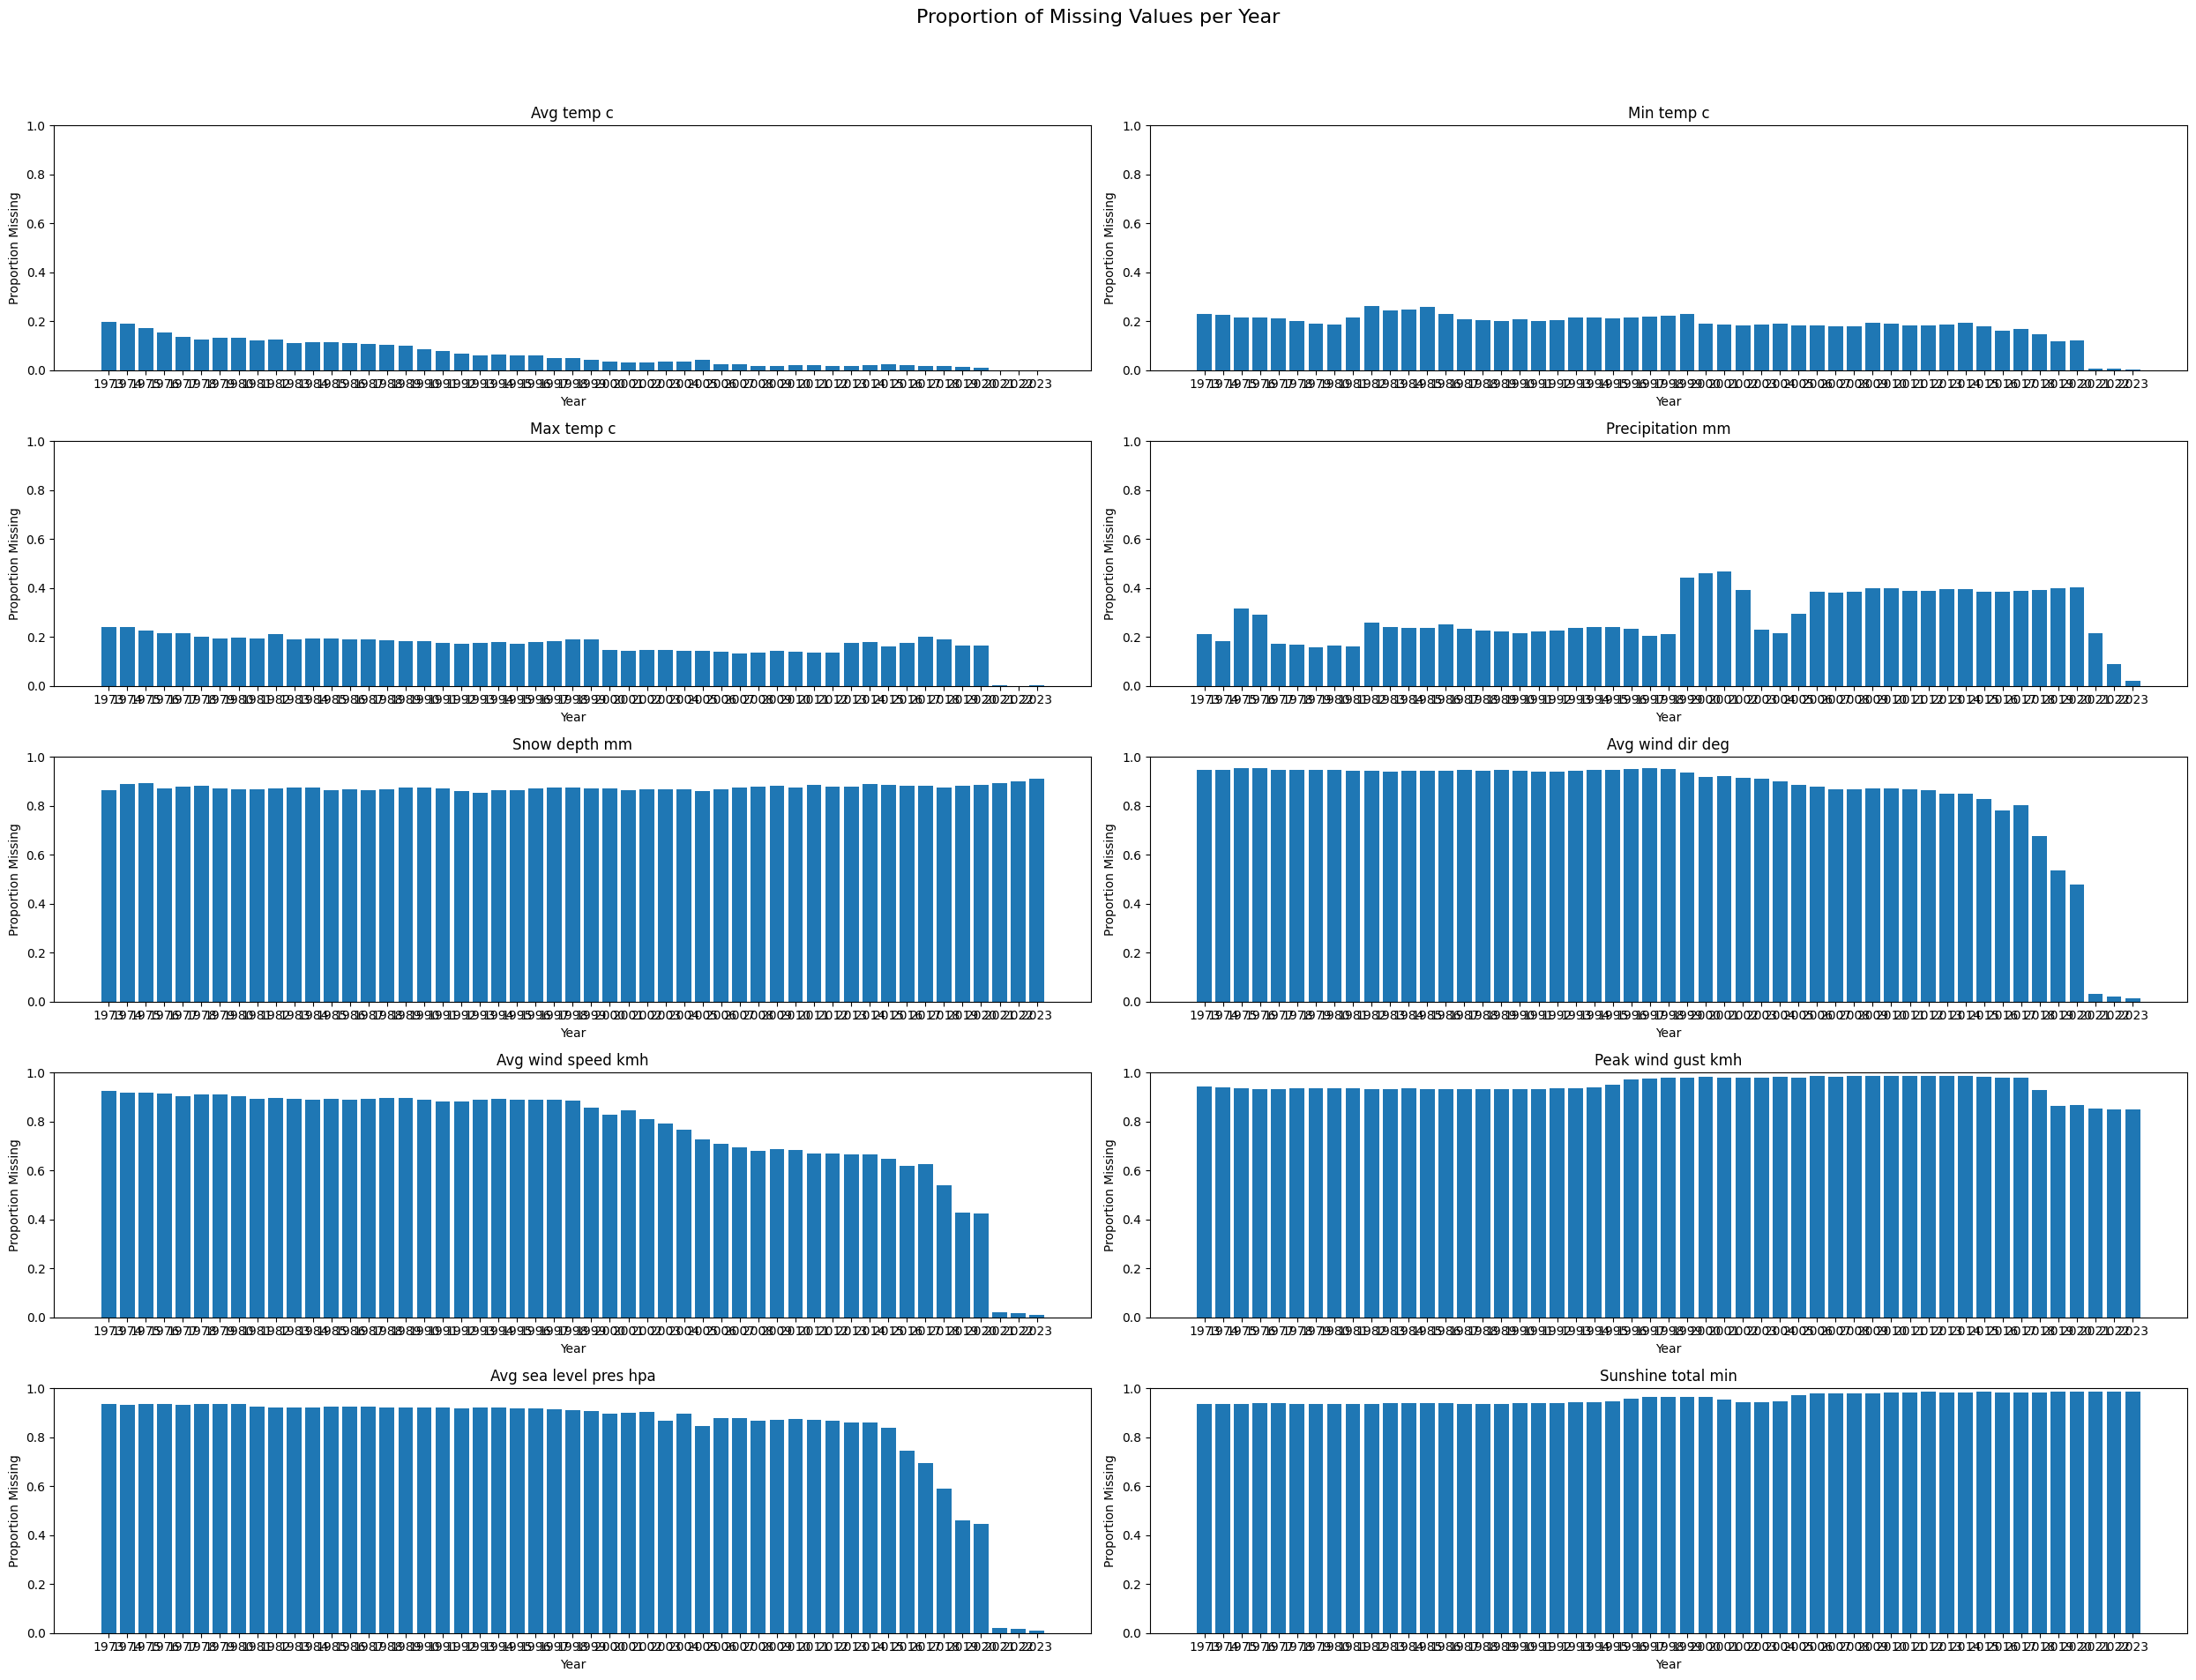

In [15]:
# Extracting year from 'date' column for grouping
df['year'] = df['date'].dt.year

# Calculate missing value proportion for each feature by year
missing_values_df = df.set_index('year').isna().groupby('year').mean().reset_index()

# Plotting
fig, axs = plt.subplots(5, 2, figsize=(25, 20))
fig.suptitle('Proportion of Missing Values per Year', fontsize=16)
axs = axs.flatten()

for i, col in enumerate(missing_values_df.columns[5:]): 
    axs[i].bar(missing_values_df['year'].astype(str), missing_values_df[col])
    axs[i].set_title(col.replace('_', ' ').capitalize())
    axs[i].set_ylabel('Proportion Missing')
    axs[i].set_xlabel('Year')
    axs[i].set_ylim(0, 1) 

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We see that the main temperature and precipitation data are available which is good enough. For the remaining we want to invistigate their geographical distribution. For this we create the following map of missing data.

In [16]:
# Removing the 'city_name' column from the original df DataFrame
df_dropped_city_name = df.drop(columns=['city_name'])

# Merging df_dropped_city_name with df_cities on 'station_id'
df_merged = pd.merge(df_dropped_city_name, df_cities, on='station_id', how='left')

df_merged.head()

,station_id,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,...,avg_sea_level_pres_hpa,sunshine_total_min,year,city_name,country,state,iso2,iso3,latitude,longitude
0,41515,1973-01-21,Winter,-0.6,-5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1973,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005
1,41515,1973-02-03,Winter,3.5,-1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1973,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005
2,41515,1973-02-12,Winter,7.2,2.0,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1973,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005
3,41515,1973-02-18,Winter,8.8,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1973,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005
4,41515,1973-02-24,Winter,4.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1973,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005


/tmp/ipykernel_869359/760897036.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


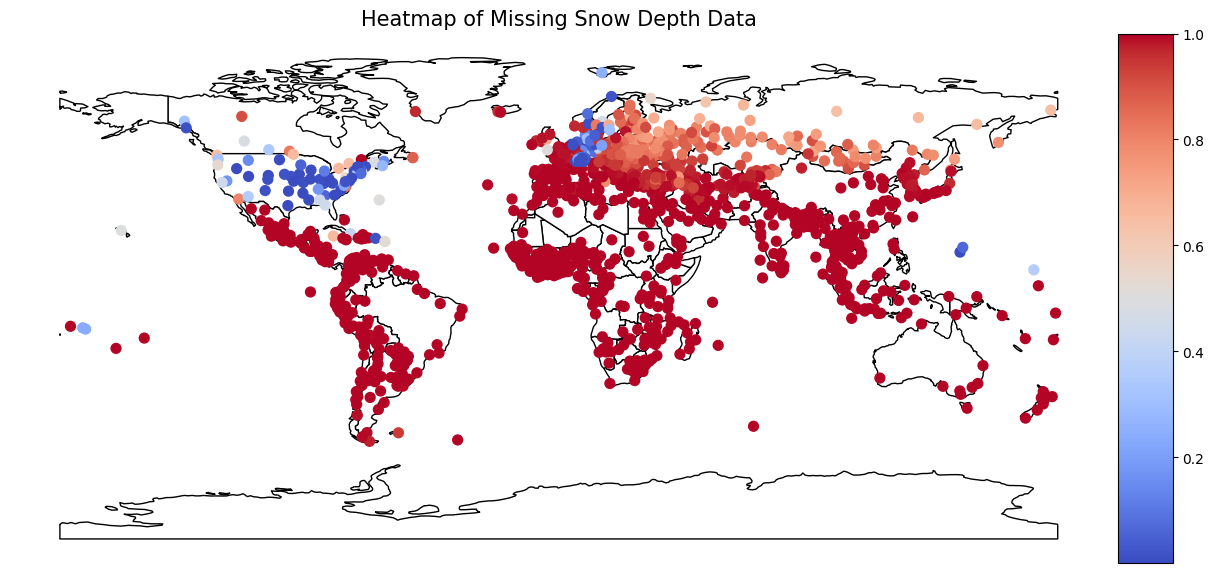

In [17]:
# First, we need to calculate the proportion of missing values for 'snow_depth_mm' for each station
df_merged['missing_snow_depth'] = df_merged['snow_depth_mm'].isna().astype(int)
proportion_missing_snow = df_merged.groupby('station_id')['missing_snow_depth'].mean().reset_index()

# Merging the proportions back to df_cities to get the latitude and longitude
df_cities_with_snow_missing = pd.merge(df_cities, proportion_missing_snow, on='station_id', how='left')

# Now we create the world map heatmap
# Create a GeoDataFrame from df_cities_with_snow_missing
gdf = gpd.GeoDataFrame(
    df_cities_with_snow_missing, geometry=gpd.points_from_xy(df_cities_with_snow_missing.longitude, df_cities_with_snow_missing.latitude))

# World map with country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(column='missing_snow_depth', ax=ax, legend=True, cax=cax, cmap='coolwarm', markersize=50)

ax.set_title('Heatmap of Missing Snow Depth Data', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.axis('off')

plt.show()

We see only the USA has enough data and this goes also for all data not only snow depth data. So we create a subset for the USA only which will be used as a single case study and for the rest we will remove the snow depth, wind, sea level and sunshine data as they won't be used. 

In [18]:
df_usa = df_merged[df_merged['country'] == 'United States']
columns_to_remove = ['snow_depth_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh', 
                     'peak_wind_gust_kmh', 'avg_sea_level_pres_hpa', 'sunshine_total_min']

# Removing the specified columns
df_merged = df_merged.drop(columns=columns_to_remove)

Now let's see the energy consumption dataset:

In [19]:
df_energy

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


There are many columns that are needed:

In [20]:
# List of columns to keep
columns_to_keep = ['country', 'year', 'population', 'gdp', 'biofuel_share_elec', 'biofuel_share_energy', 'coal_share_elec', 'coal_share_energy', 'electricity_share_energy', 'fossil_share_elec', 'fossil_share_energy', 'gas_share_elec', 'gas_share_energy', 'hydro_share_elec', 'hydro_share_energy', 'low_carbon_share_elec', 'low_carbon_share_energy', 'nuclear_share_elec', 'nuclear_share_energy', 'oil_share_elec', 'oil_share_energy', 'other_renewables_share_elec', 'other_renewables_share_elec_exc_biofuel', 'other_renewables_share_energy', 'renewables_share_elec', 'renewables_share_energy', 'solar_share_elec', 'solar_share_energy', 'wind_share_elec', 'wind_share_energy']

# Keeping only the specified columns in df_energy
df_energy = df_energy[columns_to_keep]

In [21]:
countries_energy = df_energy.country.unique()
countries_weather = df_merged.country.unique()
shared_countries = set(countries_energy).intersection(set(countries_weather))
len_countries_energy = len(countries_energy)
len_countries_weather = len(countries_weather)
len_shared_countries = len(shared_countries)

len_countries_energy, len_countries_weather, len_shared_countries

(306, 216, 187)

We see that the common countries between weather and energy datasets are less than what we have in the weather dataset. Let's investigate this further

In [22]:
# Finding the countries that are in the weather dataset but not in the energy dataset
countries_in_weather_not_in_energy = set(countries_weather) - set(countries_energy)

countries_in_weather_not_in_energy

{'Andorra',
 'Anguilla',
 'Christmas Island',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Czech Republic',
 'French Southern and Antarctic Lands',
 'Guernsey',
 'Guinea Bissau',
 'Isle of Man',
 'Ivory Coast',
 'Jersey',
 'Liechtenstein',
 'Macau S.A.R',
 'Macedonia',
 'Marshall Islands',
 'Mayotte',
 'Monaco',
 'Norfolk Island',
 'Réunion',
 'San Marino',
 'South Georgia',
 'Svalbard and Jan Mayen Islands',
 'Swaziland',
 'São Tomé and Príncipe',
 'The Bahamas',
 'The Gambia',
 'United States of America',
 'Wallis and Futuna'}

In [23]:
country_to_check = 'Reunion'
exists_in_energy = country_to_check in countries_energy

print(exists_in_energy)


True


We see that there are several syntax differences so we fix that to have 7 more countries

In [24]:
# After several inspectations 
corrections = {
    'United States': 'United States of America',
    'Gambia': 'The Gambia',
    'Bahamas': 'The Bahamas',
    'Cote d\'Ivoire' : 'Ivory Coast',
    'Reunion' : 'Réunion',
    'Czechia' : 'Czech Republic',  
    'Guinea-Bissau' : 'Guinea Bissau'  
}

# Replacing incorrect country names with correct ones in the 'country' column
df_energy['country'] = df_energy['country'].replace(corrections)

/tmp/ipykernel_869359/1162820339.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy['country'] = df_energy['country'].replace(corrections)


In [25]:
countries_energy = df_energy.country.unique()
countries_weather = df_merged.country.unique()

shared_countries = set(countries_energy).intersection(set(countries_weather))

In [26]:
# Filtering df_energy to keep only rows where the country is one of the shared countries
df_energy_filtered = df_energy[df_energy['country'].isin(shared_countries)]
df_energy_filtered = df_energy_filtered[df_energy_filtered['year'] >= 1973]

# Displaying the filtered DataFrame
df_energy_filtered.head()

,country,year,population,gdp,biofuel_share_elec,biofuel_share_energy,coal_share_elec,coal_share_energy,electricity_share_energy,fossil_share_elec,...,oil_share_energy,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,renewables_share_elec,renewables_share_energy,solar_share_elec,solar_share_energy,wind_share_elec,wind_share_energy
96,Afghanistan,1973,11575308.0,1.356863e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Afghanistan,1974,11869881.0,1.430911e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Afghanistan,1975,12157390.0,1.517777e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Afghanistan,1976,12425276.0,1.602361e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,Afghanistan,1977,12687308.0,1.520736e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_energy_filtered.describe()

,year,population,gdp,biofuel_share_elec,biofuel_share_energy,coal_share_elec,coal_share_energy,electricity_share_energy,fossil_share_elec,fossil_share_energy,...,oil_share_energy,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,renewables_share_elec,renewables_share_energy,solar_share_elec,solar_share_energy,wind_share_elec,wind_share_energy
count,8685.000000,8.685000e+03,6.518000e+03,4500.000000,1595.000000,4900.000000,3051.000000,2954.000000,4900.000000,3051.000000,...,3051.000000,5264.000000,4360.000000,2835.000000,5222.000000,3051.000000,5193.000000,2633.000000,5230.000000,2682.000000
mean,1999.232009,3.311789e+07,4.069512e+11,1.794551,0.473554,14.427350,18.858615,13.540631,63.561763,84.365699,...,42.895061,2.418309,0.823253,0.962106,30.855089,11.296014,0.625670,0.239696,1.428208,0.785842
std,13.513703,1.249265e+08,1.348668e+12,3.712277,0.903567,23.651531,19.346299,4.454712,33.023171,15.267903,...,16.633135,5.406471,3.985498,1.896474,32.212965,13.189452,2.158046,0.719317,4.942266,2.226302
min,1973.000000,2.245000e+03,1.642060e+08,0.000000,0.000000,0.000000,0.000000,1.033000,0.000000,25.698000,...,7.068000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1988.000000,1.362157e+06,1.718681e+10,0.000000,0.000000,0.000000,3.899500,10.692250,37.588750,77.792500,...,31.429500,0.000000,0.000000,0.000000,2.186000,2.132500,0.000000,0.000000,0.000000,0.000000
50%,2000.000000,7.106238e+06,6.114412e+10,0.045000,0.064000,0.000000,12.643000,13.574500,70.549000,88.421000,...,41.191000,0.057500,0.000000,0.201000,17.608000,6.116000,0.000000,0.000000,0.000000,0.004000
75%,2011.000000,2.129344e+07,2.496203e+11,1.548500,0.686000,22.126000,27.024500,16.142000,94.590000,96.194000,...,52.104500,1.778000,0.000000,0.908500,54.901000,16.598000,0.065000,0.024000,0.145750,0.329500
max,2022.000000,1.425894e+09,1.815162e+13,32.743000,7.486000,100.000000,80.137000,33.141000,100.000000,100.000000,...,99.968000,49.845000,48.400000,21.583000,100.000000,74.302000,40.000000,7.586000,56.840000,26.157000


In [28]:
print(df_energy_filtered.isna().sum())

country                                       0
year                                          0
population                                    0
gdp                                        2167
biofuel_share_elec                         4185
biofuel_share_energy                       7090
coal_share_elec                            3785
coal_share_energy                          5634
electricity_share_energy                   5731
fossil_share_elec                          3785
fossil_share_energy                        5634
gas_share_elec                             3785
gas_share_energy                           5634
hydro_share_elec                           3336
hydro_share_energy                         5634
low_carbon_share_elec                      3306
low_carbon_share_energy                    5634
nuclear_share_elec                         3496
nuclear_share_energy                       6381
oil_share_elec                             3785
oil_share_energy                        

We see that there are many missing values in this dataset so let's the geographical distribution of available data

/tmp/ipykernel_869359/2674261528.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_availability = df_energy_filtered.groupby('country').apply(lambda x: x.notna().sum().mean()).reset_index(name='data_availability')
/tmp/ipykernel_869359/2674261528.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


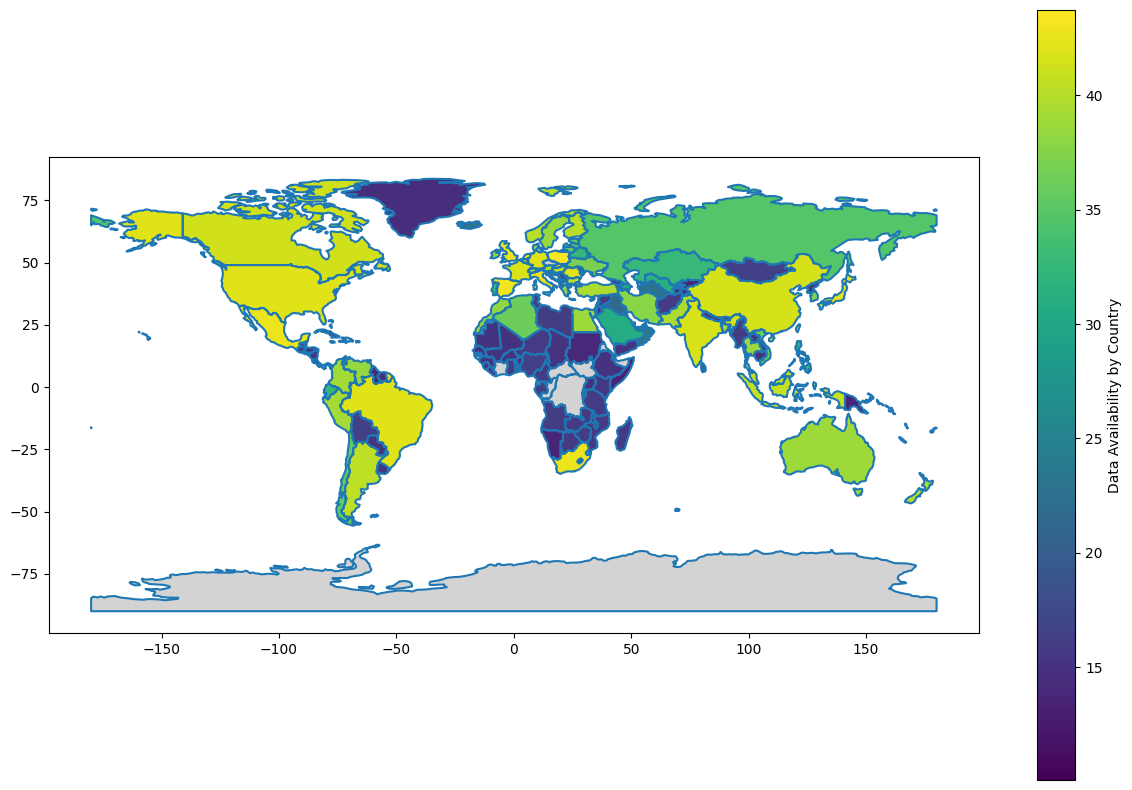

In [29]:
# 1. Prepare Data Availability Metric 
data_availability = df_energy_filtered.groupby('country').apply(lambda x: x.notna().sum().mean()).reset_index(name='data_availability')

# 2. Load World Map Data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 3. Merge Data Availability with World Map
world = world.merge(data_availability, how='left', left_on='name', right_on='country')

# 4. Plot the Heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='data_availability', ax=ax, legend=True, legend_kwds={'label': "Data Availability by Country"},
           cmap='viridis', missing_kwds={'color': 'lightgrey'})

plt.show()

We see that there are many countries with more than a third of available data. On a range of 50 years have some missing data for energy consumption is okay for our story as we study the correlation between climate change and energy consumption and this can be better observed through the evolution of long range periods rather than year by year except for the past 20 years in which the industry has been in a heavily accelerated growth. We check that we have enough data around 70% for the past 20 years.

/tmp/ipykernel_869359/4263012501.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_availability_by_year_percent = df_energy_filtered.groupby('year').apply(lambda x: x.notna().sum()).sum(axis=1) / total_possible_values_per_year * 100


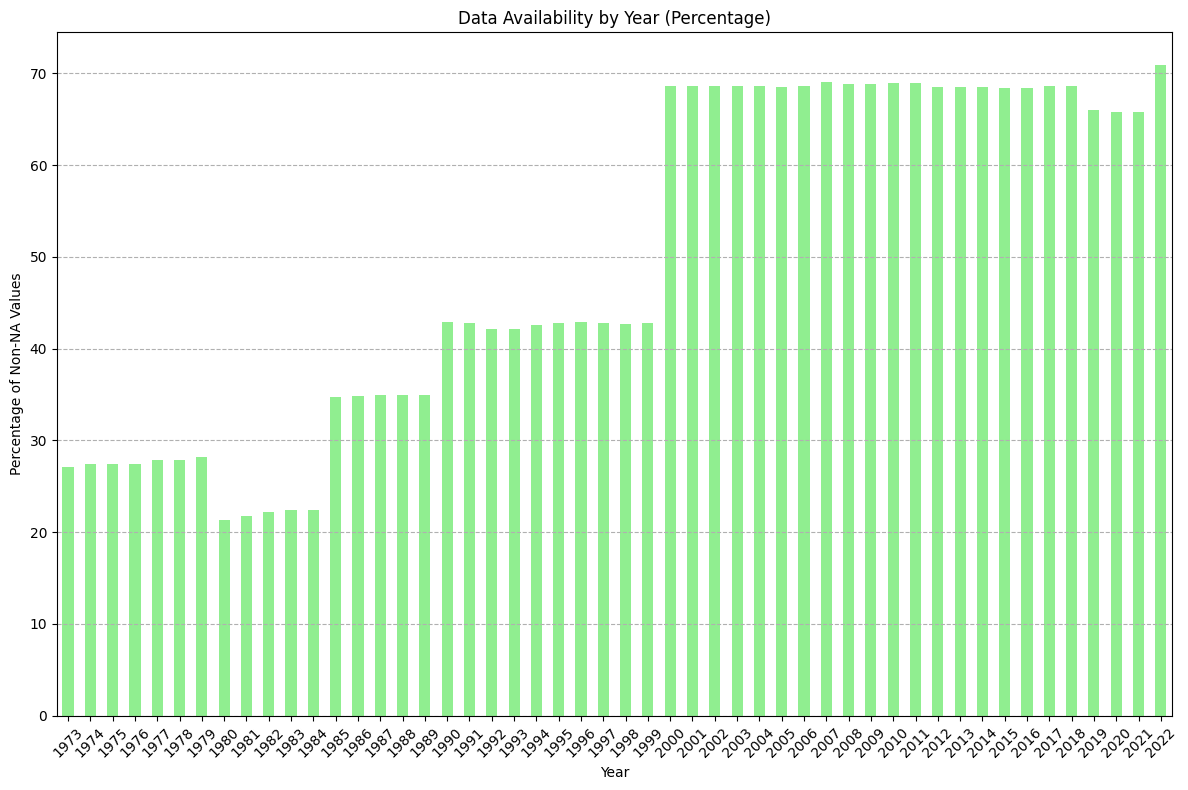

In [30]:
# Calculate the percentage of non-NA values for each year across all columns
total_possible_values_per_year = len(df_energy_filtered.columns) * df_energy_filtered.groupby('year').size()
data_availability_by_year_percent = df_energy_filtered.groupby('year').apply(lambda x: x.notna().sum()).sum(axis=1) / total_possible_values_per_year * 100

# Plotting the data availability by year in percentages
plt.figure(figsize=(12, 8))
data_availability_by_year_percent.plot(kind='bar', color='lightgreen')
plt.title('Data Availability by Year (Percentage)')
plt.xlabel('Year')
plt.ylabel('Percentage of Non-NA Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [31]:
df_energy_filtered = df_energy_filtered[df_energy_filtered.year>1999]

In [34]:
df_energy_filtered.to_csv('data/filtered_df.csv',index=False)